In [51]:
from tensorflow.keras import optimizers,datasets,layers
import tensorflow as tf


In [52]:
from keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()


In [53]:
train_x.shape
#DATA IS 3D (RGB) IMAGES

(50000, 32, 32, 3)

In [54]:
train_x=train_x.reshape(50000,32,32,3)
test_x=test_x.reshape(10000,32,32,3)

In [55]:
train_x.shape

(50000, 32, 32, 3)

In [56]:
print(train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [57]:
train_x=train_x.astype('float32')/255
test_x=test_x.astype('float32')/255

print(train_x[0])
print(train_y[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


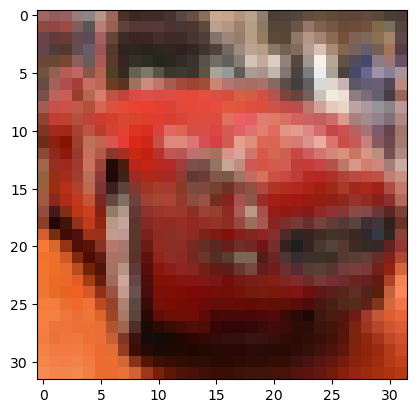

In [58]:
import matplotlib.pyplot as plt
plt.imshow(train_x[5])



In [59]:
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)

In [60]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [61]:
train_x.shape

(50000, 32, 32, 3)

In [62]:
from tensorflow.keras import activations,Sequential


In [63]:
model=Sequential()

In [64]:
model.add(layers.Input(shape=(32,32,3)))

model.add(layers.Conv2D(filters= 32,kernel_size=5,strides=1,padding='same',activation=tf.nn.relu,input_shape=(28,28,1)))

In [65]:
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

In [66]:
model.add(layers.Conv2D(filters= 64,kernel_size=6,strides=(1,1),padding='same',activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(3,3),strides=(3,3),padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation=tf.nn.relu))
model.add(layers.Dense(units=10,activation=tf.nn.softmax))

In [67]:
train_x=train_x.reshape(50000,32,32,3)
test_x=test_x.reshape(10000,32,32,3)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x=train_x,y=train_y,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.3354 - loss: 1.8209 - val_accuracy: 0.5288 - val_loss: 1.3317
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.5541 - loss: 1.2563 - val_accuracy: 0.5991 - val_loss: 1.1442
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.6208 - loss: 1.0694 - val_accuracy: 0.6183 - val_loss: 1.0874
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.6611 - loss: 0.9635 - val_accuracy: 0.6436 - val_loss: 1.0275
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.6885 - loss: 0.8931 - val_accuracy: 0.6575 - val_loss: 0.9804
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.7113 - loss: 0.8260 - val_accuracy: 0.6713 - val_loss: 0.9467
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.7320 - loss: 0.7691 - val_accuracy: 0.6732 - val_loss: 0.9517
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.7555 - loss: 0.7060 - 

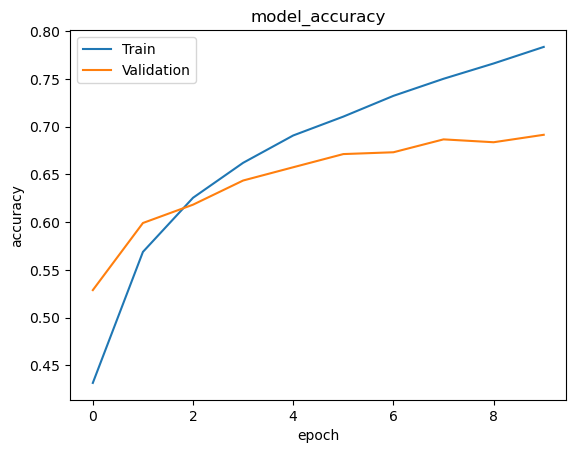

In [68]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


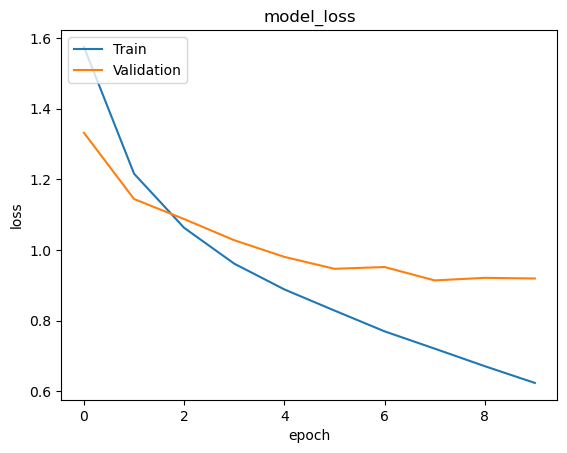

In [69]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()
